# Nivelatorio II: Estadística para la Ciencia de Datos

## Solución sugerida actividad en casa #3

In [11]:
import pandas as pd   ## Libreria para manipular y analizar datos
import matplotlib.pyplot as plt  ## Libreria para visualizar
import seaborn as sns   ## Libreria para visualizar
import numpy as np  ## Libreria para operaciones numéricas
import plotly  ## Libreria para visualizaciones interactivas
import matplotlib.ticker as mtick  ## función para formatear en visualizaciones
from scipy.stats import skew, kurtosis  ## funciones estadísticas
from scipy.stats import norm ## distribución normal
from scipy.stats import poisson ## distribución Poisson
from scipy.stats import t ## distribución t
from scipy.stats import ttest_1samp  ## Prueba t
import statsmodels.stats as sm  ## funciones estadísticas
import statsmodels.api as sm1  ## funciones estadísticas

In [5]:
## Cargamos los datos de la muestra
base = pd.read_csv("Muestra_styt.csv",sep=";")
base

,ESTU_GENERO,ESTU_FECHANACIMIENTO,ESTU_CONSECUTIVO,MOD_RAZONA_CUANTITAT_PUNT,MOD_LECTURA_CRITICA_PUNT,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMUNI_ESCRITA_PUNT,MOD_INGLES_PUNT,MOD_INGLES_DESEM
0,F,09/11/1976,EK201640032296,89,100,124,103.0,99,A1
1,F,13/06/1987,EK201640032078,93,110,97,145.0,87,A1
2,M,20/05/1992,EK201640042250,100,85,67,126.0,92,A1
3,M,15/11/1993,EK201640054764,83,71,91,63.0,104,A2
4,M,01/05/1996,EK201640047051,70,61,69,97.0,85,A1
...,...,...,...,...,...,...,...,...,...
376,M,07/09/1995,EK201640048651,101,100,107,98.0,110,A2
377,M,23/08/1991,EK201640041650,93,106,97,118.0,91,A1
378,F,24/08/1993,EK201640035953,70,92,84,105.0,73,A1-
379,F,11/06/1997,EK201640056408,59,82,69,75.0,79,A1-


1. Conociendo que el tamaño total de la población es 52712 ¿es óptimo el tamaño de muestra escogido, teniendo en cuenta que se quería tener un margen de error de 5% y un nivel de confianza del 95%? Justifique y demuestre.

In [2]:
# Cargamos la función de tamaño de muestra
def tam_muestra(tam_pobl,prop,error,conf):
    N=tam_pobl
    p=prop
    e=error
    z=norm.ppf(q=(1-conf)/2)
    n=(N*p*(1-p)*z**2)/(((N-1)*e**2)+(p*(1-p)*z**2))
    return round(n)

In [6]:
## Reemplazamos los datos en la función:
tam_muestra(52712,0.5,0.05,0.95)

381

La muestra que se nos entregó tiene 381 individuos seleccionados aleatoriamente. Al verificar el tamaño óptimo de la muestra reemplazando los valores correspondientes, se obtiene un tamaño de 381. Es decir, sí es óptimo.

2. Muestre las estadísticas descriptivas del puntaje de razonamiento cuantitativo. Grafique y describa la distribución.

In [8]:
def fun_tabla_descriptivas(columnas):
    tabla_descriptivas=pd.DataFrame(columnas.describe())
    tabla_descriptivas.loc['coef. variation']=columnas.std()/columnas.mean()
    tabla_descriptivas.loc['skew']=skew(columnas)
    tabla_descriptivas.loc['kurtosis']=kurtosis(columnas)
    return tabla_descriptivas

In [12]:
fun_tabla_descriptivas(base["MOD_RAZONA_CUANTITAT_PUNT"])

,MOD_RAZONA_CUANTITAT_PUNT
count,381.000000
mean,97.603675
std,21.810014
min,43.000000
25%,83.000000
50%,98.000000
75%,112.000000
max,156.000000
coef. variation,0.223455
skew,0.063255


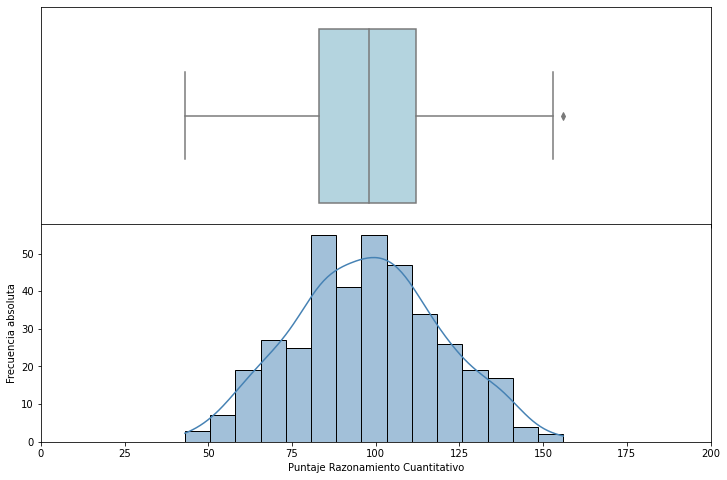

In [48]:
## Graficamos la variable:
fig, axs = plt.subplots(nrows=2)
fig.set_size_inches(12, 8)
fig.subplots_adjust(hspace=0)

ax1 = sns.boxplot(x=base["MOD_RAZONA_CUANTITAT_PUNT"],color="lightblue",ax=axs[0])
ax1.set(xlim=(0, 200))
ax1.set_xlabel('')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_yticks([])

ax2=sns.histplot(x=base["MOD_RAZONA_CUANTITAT_PUNT"],kde=True,color="steelblue",ax=axs[1])
ax2.set(xlim=(0, 200))
ax2.set_xlabel('Puntaje Razonamiento Cuantitativo')
ax2.set_ylabel('Frecuencia absoluta')

plt.show()

Teniendo en cuenta las estadísticas descriptivas y los gráficos realizados, podríamos comentar que la distribución del puntaje de razonamiento cuantitativo en la muestra recolectada no parece ser asimétrica (coeficiente de asimetría muy cercano a 0, media y mediana muy cercanos y el histograma y boxplot mostrando simetría en las colas). Los datos se agrupan alrededor de un único centro, que está en 98 puntos, con una dispersión media de casi 22 puntos. El 50% de los datos está agrupado entre 83 y 112 puntos.

3. ¿Cuál es la estimación de la media del puntaje de razonamiento cuantitativo poblacional?

In [50]:
base["MOD_RAZONA_CUANTITAT_PUNT"].mean()

97.60367454068242

Recordando que si la muestra tiene un tamaño óptimo y es representativa, la media muestral es un estimador puntual de la media poblacional. Por tanto, podríamos decir que un estudiante que presenta el Saber TyT obtiene en promedio 97.6 puntos en la prueba de razonamiento cuantitativo. Recordemos que en la sesión vimos que ya sabemos que este valor no es exactamente igual al valor poblacional, pero está muy cercano, por tanto es la mejor estimación que tenemos. 

4. Construya intervalos de confianza para la media de dicha prueba, con niveles de confianza del 90%, 95% y 99%. ¿Qué concluye sobre la media de dicha prueba?

In [52]:
# Intervalo de confianza del 90%
print("IC 90%")
print(sm1.stats.DescrStatsW(base["MOD_RAZONA_CUANTITAT_PUNT"]).tconfint_mean(0.1))

# Intervalo de confianza del 95%
print("IC 95%")
print(sm1.stats.DescrStatsW(base["MOD_RAZONA_CUANTITAT_PUNT"]).tconfint_mean(0.05))

# Intervalo de confianza del 99%
print("IC 99%")
print(sm1.stats.DescrStatsW(base["MOD_RAZONA_CUANTITAT_PUNT"]).tconfint_mean(0.01))

IC 90%
(95.76128790823799, 99.44606117312685)
IC 95%
(95.40669008335581, 99.80065899800903)
IC 99%
(94.71101830024743, 100.49633078111741)


Voy a interpretar solo el intervalo de confianza del 95%, solo para mostrar cómo sería: Con un 95% de confianza, se puede esperar que el puntaje promedio en la prueba de razonamiento cuantitativo esté entre 94.7 y 100.5 puntos.

5. Un asesor del Icfes asegura que la media del puntaje de razonamiento cuantitativo es 90. ¿Qué puede decir sobre tal afirmación?

Teniendo en cuenta la afirmación del asesor, podemos deducir que se trata de una prueba de dos colas, donde las hipótesis son:  
  - Ho: La media del puntaje de razonamiento cuantitativo es igual a 90  
  - Ha: La media del puntaje de razonamiento cuantitativo NO es igual a 90

In [55]:
## Realizamos entonces la prueba t, dado que no conocemos la desviación estándar de la población:
ttest_1samp(a=base["MOD_RAZONA_CUANTITAT_PUNT"],popmean=90)

Ttest_1sampResult(statistic=6.805030205503605, pvalue=3.9468885006521075e-11)

Dado que el p-valor es menor que un nivel de significancia de 0.05, es posible rechazar la hipótesis nula. Por tanto, con un 95% de confianza (incluso con un 99%) es posible rechazar la hipótesis nula de que la media del puntaje de razonamiento cuantitativo es 90 puntos. Es decir, la afirmación del asesor no es cierta.

6. Calcule la proporción de hombres y mujeres de la muestra. Grafique dichas proporciones.

In [57]:
## Realizamos la tabla de frecuencia:
tabla_freq=(pd.crosstab(index=base["ESTU_GENERO"],columns="count")).reset_index()
tabla_freq['Freq. Rel.']=tabla_freq['count']/sum(tabla_freq['count'])
tabla_freq.rename(columns={'count':'Freq. Abs.'},inplace=True)
tabla_freq=tabla_freq.sort_values(by='Freq. Abs.',ascending=False).reset_index(drop=True)
tabla_freq

col_0,ESTU_GENERO,Freq. Abs.,Freq. Rel.
0,M,195,0.511811
1,F,186,0.488189


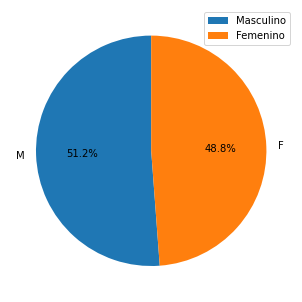

In [60]:
## Realizamos la gráfica
fig_torta = plt.figure() 
ax = fig_torta.add_axes([0,0,1,1])
plt.pie(tabla_freq["Freq. Rel."], labels=tabla_freq["ESTU_GENERO"],autopct='%1.1f%%',startangle=90)
plt.legend(labels=["Masculino","Femenino"],loc="best")
plt.show()

Teniendo en cuenta esta información, podríamos comentar que en la muestra ninguno de los géneros es la categoría mayoritaria, sino que más bien que están balanceados.

7. ¿Cuál es la estimación de la proporción de mujeres poblacional?

Recordando que si la muestra tiene un tamaño óptimo y es representativa, la proporción muestral es un estimador puntual de la proporción poblacional. Por tanto, podríamos decir que el 48.8% de los estudiantes que presentan la prueba Saber TyT pertenecen al género femenino.

8. Construya intervalos de confianza para la proporción de mujeres, con niveles de confianza del 90%, 95% y 99%. ¿Qué concluye sobre la proporción de mujeres?

In [61]:
#intervalo de confianza (numero de fumadoras,total muestra,nivel de significancia)
print("IC 90%")
print(sm.proportion.proportion_confint(186,381,0.1))
print("IC 95%")
print(sm.proportion.proportion_confint(186,381,0.05))
print("IC 99%")
print(sm.proportion.proportion_confint(186,381,0.01))

IC 90%
(0.4460665314580613, 0.5303114212978443)
IC 95%
(0.43799698747935933, 0.5383809652765462)
IC 99%
(0.4222255215246037, 0.5541524312313019)


Con un 95% de confianza, se puede esperar que la proporción de mujeres esté entre 43.8% y 53.8%.

9. Un asesor del Icfes considera que 2 de cada 3 estudiantes que presentan el Saber TYT son mujeres ¿Qué puede decir sobre tal afirmación?

Teniendo en cuenta la afirmación del asesor, podemos deducir que se trata de una prueba de dos colas, donde las hipótesis son:  
  - Ho: La proporción de mujeres es igual a 66.6% 
  - Ha: La proporción de mujeres NO es igual a 66.6%

In [63]:
## Realizamos la prueba z de proporciones
z,vp = sm.proportion.proportions_ztest(186,381,value=0.666)
print(f'Estadístico Z= {z}, Valor-p= {vp}')

Estadístico Z= -6.943402921480564, Valor-p= 3.827656758282525e-12


Dado que el p-valor es menor que un nivel de significancia de 0.05, es posible rechazar la hipótesis nula. Por tanto, con un 95% de confianza (incluso con un 99%) es posible rechazar la hipótesis nula de que la proporción de mujeres es igual a 66.6%. Es decir, la afirmación del asesor no es cierta.